# OOI Pioneer Profiler Moorings

Taking [OOI Pioneer array data](https://dataexplorer.oceanobservatories.org) and wiriting it in [`profiles`](https://mitgcm.readthedocs.io/en/latest/ocean_state_est/ocean_state_est.html#profiles-model-data-comparisons-at-observed-locations) package format.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import xmitgcm

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

## Load OOI DataSets

In [2]:
dataPath = '/scratch2/shared/ooi-pioneer/'
dataFiles = os.listdir(dataPath)[5:]

In [10]:
ds = {}
for file in dataFiles:
    ds[file[0 : file.index('.')]] = xr.open_dataset(dataPath + file)

In [12]:
ds['cp04ospm']

<xarray.Dataset>
Dimensions:                                                     (row: 3978245)
Dimensions without coordinates: row
Data variables:
    time                                                        (row) datetime64[ns] ...
    sea_water_practical_salinity_profiler_depth_enabled         (row) float64 ...
    sea_water_density_profiler_depth_enabled                    (row) float64 ...
    sea_water_pressure_profiler_depth_enabled                   (row) float64 ...
    sea_water_temperature_profiler_depth_enabled                (row) float64 ...
    sea_water_practical_salinity_profiler_depth_enabled_qc_agg  (row) float64 ...
    sea_water_density_profiler_depth_enabled_qc_agg             (row) float64 ...
    sea_water_pressure_profiler_depth_enabled_qc_agg            (row) float64 ...
    sea_water_temperature_profiler_depth_enabled_qc_agg         (row) float64 ...
    z                                                           (row) float64 ...
Attributes:
    cdm_altitude_proxy:            z
    cdm_data_type:                 TimeSeriesProfile
    cdm_profile_variables:         time
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.axiomdatascience.com
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_institution:           Ocean Observatories Initiative (OOI)
    creator_name:                  Ocean Observatories Initiative (OOI)
    creator_sector:                gov_federal
    creator_type:                  institution
    creator_url:                   https://oceanobservatories.org/
    defaultDataQuery:              sea_water_practical_salinity_profiler_dept...
    featureType:                   TimeSeriesProfile
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Ocean Observatories Initia...
    id:                            103952
    infoUrl:                       https://sensors.ioos.us/#metadata/103952/s...
    institution:                   Ocean Observatories Initiative (OOI)
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    platform:                      profiling_buoy
    platform_name:                 Coastal Pioneer: Offshore Profiler Mooring...
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_institution:         Ocean Observatories Initiative (OOI)
    publisher_name:                Ocean Observatories Initiative (OOI)
    publisher_sector:              gov_federal
    publisher_type:                institution
    publisher_url:                 https://oceanobservatories.org/
    references:                    https://ooinet.oceanobservatories.org/data...
    sourceUrl:                     https://ooinet.oceanobservatories.org/data...
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    103952
    summary:                       Timeseries data from 'Coastal Pioneer: Off...
    time_coverage_end:             2021-08-22T18:19:00Z
    time_coverage_start:           2014-04-15T20:00:00Z
    title:                         Coastal Pioneer: Offshore Profiler Mooring...

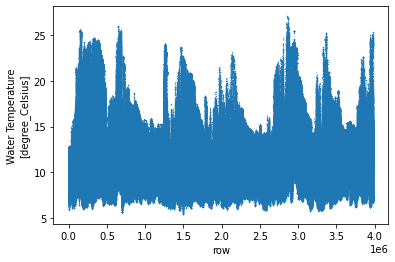

In [15]:
ds['cp04ospm']['sea_water_temperature_profiler_depth_enabled'].plot(x='row',\
                              marker='o', linewidth=0.,\
                              markersize=0.2)

## Write iPROFs

In [16]:
ts = dict(prof_T = (['iPROF'], ds['cp04ospm']['sea_water_temperature_profiler_depth_enabled']),
          prof_Tflag = (['iPROF'], ds['cp04ospm']['sea_water_temperature_profiler_depth_enabled_qc_agg']),
          prof_S = (['iPROF'], ds['cp04ospm']['sea_water_practical_salinity_profiler_depth_enabled']),
          prof_Sflag = (['iPROF'], ds['cp04ospm']['sea_water_practical_salinity_profiler_depth_enabled_qc_agg']),
         )

ds2 = xr.Dataset( data_vars=ts,
                  attrs = dict(description='totally a test'),
                )

In [17]:
ds2

<xarray.Dataset>
Dimensions:     (iPROF: 3978245)
Dimensions without coordinates: iPROF
Data variables:
    prof_T      (iPROF) float64 12.08 12.01 12.09 11.92 ... 6.838 6.685 6.675
    prof_Tflag  (iPROF) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    prof_S      (iPROF) float64 35.08 35.05 35.09 35.0 ... 35.12 35.11 35.11
    prof_Sflag  (iPROF) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    description:  totally a test